In [1]:
import h5py 
import matplotlib.pyplot as plt 

In [40]:
h5_filepath = r"SpikeData_300.h5"

with h5py.File(h5_filepath, 'r') as df:
    for key in df.keys():
       print(key)
    start = df["spikes/start"][:]
    middle = df["spikes/start"][:]
    end = df["spikes/start"][:]
    patterns = df["spikes/patterns"][:]
    decoded_patterns = [p.decode('utf-8') for p in patterns]
    print(patterns)
    print(df["t_array"][:])
    
    print(df["X"][()])
    print(df["dt"][()])
    print(df["total_time"][()])


# Цвета по типу
pattern_colors = {
    "Regular": "blue",
    "Semiregular": "orange",
    "Irregular": "red"
}
import plotly.graph_objects as go
# Создание графика
fig = go.Figure()

for neuron_idx, spike_times in enumerate(start_times):
    pattern = decoded_patterns[neuron_idx]
    color = pattern_colors.get(pattern, "gray")
    
    fig.add_trace(go.Scatter(
        x=spike_times,
        y=[neuron_idx] * len(spike_times),
        mode='markers',
        marker=dict(color=color, size=4),
        name=pattern,
        showlegend=(neuron_idx == decoded_patterns.index(pattern))  # чтобы не дублировать легенду
    ))

fig.update_layout(
    title="Spike Raster Plot по аксонам",
    xaxis_title="Время (мс)",
    yaxis_title="Индекс аксона",
    height=600,
    template="plotly_white"
)

fig.show()

X
dt
spikes
t_array
total_time
[b'Regular' b'Regular' b'Regular' b'Semiregular' b'Regular' b'Regular'
 b'Irregular' b'Regular' b'Semiregular' b'Regular' b'Regular' b'Irregular'
 b'Irregular' b'Regular' b'Semiregular' b'Semiregular' b'Regular'
 b'Irregular' b'Regular' b'Regular' b'Regular' b'Regular' b'Regular'
 b'Regular' b'Irregular' b'Regular' b'Regular' b'Regular' b'Regular'
 b'Regular' b'Semiregular' b'Irregular' b'Semiregular' b'Regular'
 b'Irregular' b'Semiregular' b'Irregular' b'Regular' b'Regular' b'Regular'
 b'Regular' b'Regular' b'Irregular' b'Regular' b'Regular' b'Regular'
 b'Semiregular' b'Regular' b'Regular' b'Regular' b'Regular' b'Regular'
 b'Regular' b'Semiregular' b'Regular' b'Regular' b'Irregular'
 b'Semiregular' b'Regular' b'Regular' b'Regular' b'Semiregular' b'Regular'
 b'Regular' b'Regular' b'Semiregular' b'Regular' b'Regular' b'Semiregular'
 b'Regular' b'Regular' b'Regular' b'Semiregular' b'Regular' b'Regular'
 b'Semiregular' b'Regular' b'Irregular' b'Regular' b'Re

NameError: name 'start_times' is not defined

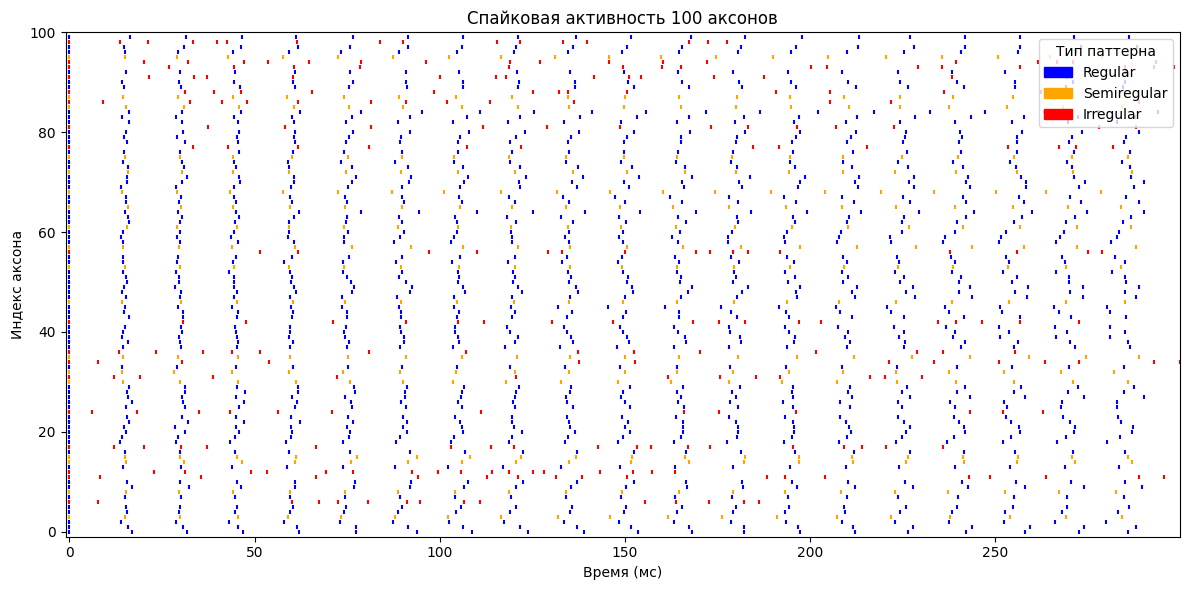

In [43]:
import h5py
import matplotlib.pyplot as plt

# Открытие файла
h5_filepath = "SpikeData_300.h5"

with h5py.File(h5_filepath, 'r') as df:
    start_times = df["spikes/start"][:]  # Ожидается: список массивов/вложенный массив
    patterns = df["spikes/patterns"][:]

# Расшифровка паттернов
decoded_patterns = [p.decode("utf-8") for p in patterns]

# Цвета для паттернов
pattern_colors = {
    "Regular": "blue",
    "Semiregular": "orange",
    "Irregular": "red"
}

# Создание графика
fig, ax = plt.subplots(figsize=(12, 6))

for neuron_idx, spike_times in enumerate(start_times):
    pattern = decoded_patterns[neuron_idx]
    color = pattern_colors.get(pattern, "gray")
    ax.vlines(spike_times, neuron_idx - 0.4, neuron_idx + 0.4, color=color)

# Настройка осей
ax.set_xlabel("Время (мс)")
ax.set_ylabel("Индекс аксона")
ax.set_title("Спайковая активность 100 аксонов")
ax.set_ylim(-1, len(start_times))
ax.set_xlim(-1, max(max(spike_times) for spike_times in start_times if len(spike_times) > 0))

# Легенда (только один раз каждый цвет)
import matplotlib.patches as mpatches
legend_patches = [mpatches.Patch(color=color, label=label) for label, color in pattern_colors.items()]
ax.legend(handles=legend_patches, title="Тип паттерна")

plt.tight_layout()
plt.show()


C:\Temp\ipykernel_19776\98860784.py:45: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



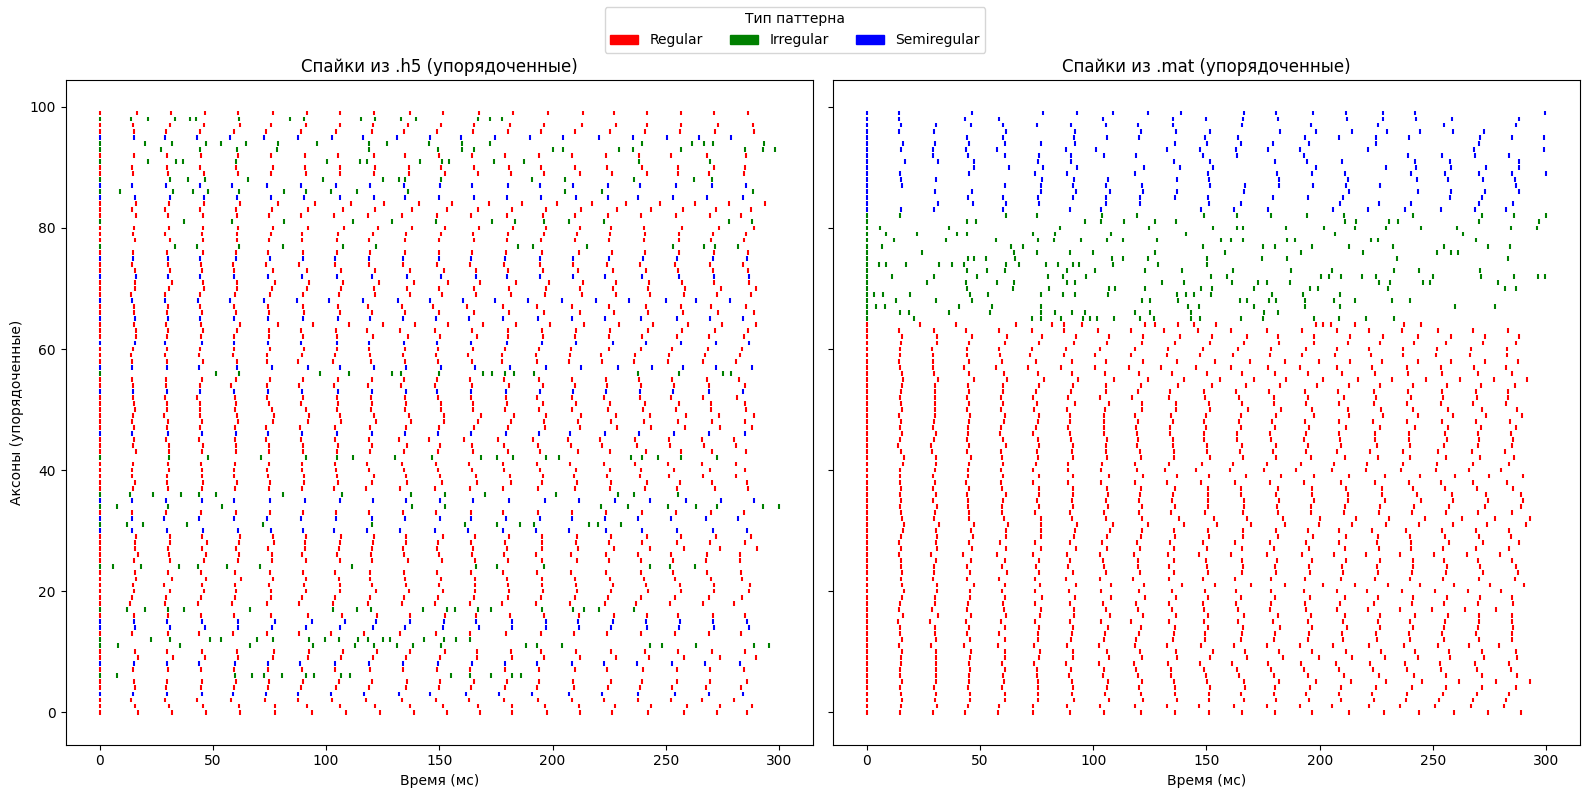

In [49]:
import h5py
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# === Цвета и классификация ===
axon_palette = {
    "regular": "red",
    "irregular": "green",
    "semiregular": "blue"
}

def classify_axon(axon, regular=65, irregular=[65, 83]):
    if axon < regular:
        return "regular"
    elif irregular[0] <= axon < irregular[1]:
        return "irregular"
    else:
        return "semiregular"

# === Загрузка данных из .h5 ===
h5_filepath = "SpikeData_300.h5"

with h5py.File(h5_filepath, 'r') as df:
    start_times_h5 = df["spikes/start"][:]  # shape (100, N)
    patterns = [p.decode("utf-8").lower() for p in df["spikes/patterns"][:]]  # lowercase

# === Упорядочим аксоны из .h5 по типу ===
# Сортировка по классификации
axon_classes = [classify_axon(i) for i in range(100)]

regular_idxs = [i for i, cls in enumerate(axon_classes) if cls == "regular"]
irregular_idxs = [i for i, cls in enumerate(axon_classes) if cls == "irregular"]
semiregular_idxs = [i for i, cls in enumerate(axon_classes) if cls == "semiregular"]

sorted_idxs = regular_idxs + irregular_idxs + semiregular_idxs

# Применим сортировку
start_times_h5_sorted = [start_times_h5[i] for i in sorted_idxs]
patterns_sorted = [patterns[i] for i in sorted_idxs]

# === Загрузка данных из .mat ===
mat = scipy.io.loadmat("SpikeData.mat")
total_time = float(mat["totalTime"])
spike_times_mat = {}

for i in range(100):
    times = np.vstack(mat["spikeTimesStart"][i]).flatten()
    spike_times_mat[i] = times

# Упорядочим аксоны из .mat в том же порядке
spike_times_mat_sorted = [spike_times_mat[i] for i in sorted_idxs]

# === Построение графиков ===
fig, axes = plt.subplots(1, 2, figsize=(16, 8), sharex=True, sharey=True)

# --- График 1: из h5 ---
for idx, spike_times in enumerate(start_times_h5_sorted):
    pattern = patterns_sorted[idx]
    color = axon_palette.get(pattern, "gray")
    axes[0].vlines(spike_times, idx - 0.4, idx + 0.4, color=color)

axes[0].set_title("Спайки из .h5 (упорядоченные)")
axes[0].set_xlabel("Время (мс)")
axes[0].set_ylabel("Аксоны (упорядоченные)")

# --- График 2: из .mat ---
for idx, spike_times in enumerate(spike_times_mat_sorted):
    pattern = classify_axon(sorted_idxs[idx])
    color = axon_palette.get(pattern, "gray")
    axes[1].vlines(spike_times, idx - 0.4, idx + 0.4, color=color)

axes[1].set_title("Спайки из .mat (упорядоченные)")
axes[1].set_xlabel("Время (мс)")

# Легенда
legend_handles = [mpatches.Patch(color=color, label=label.capitalize()) for label, color in axon_palette.items()]
fig.legend(handles=legend_handles, loc="upper center", ncol=3, title="Тип паттерна")

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


Индексы по типам:
Regular: [0, 1, 2, 3, 4]
Irregular: [65, 66, 67, 68, 69]
Semiregular: [83, 84, 85, 86, 87]
Первые 5 отсортированных паттернов: ['regular', 'regular', 'regular', 'semiregular', 'regular']


C:\Temp\ipykernel_19776\310512432.py:48: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



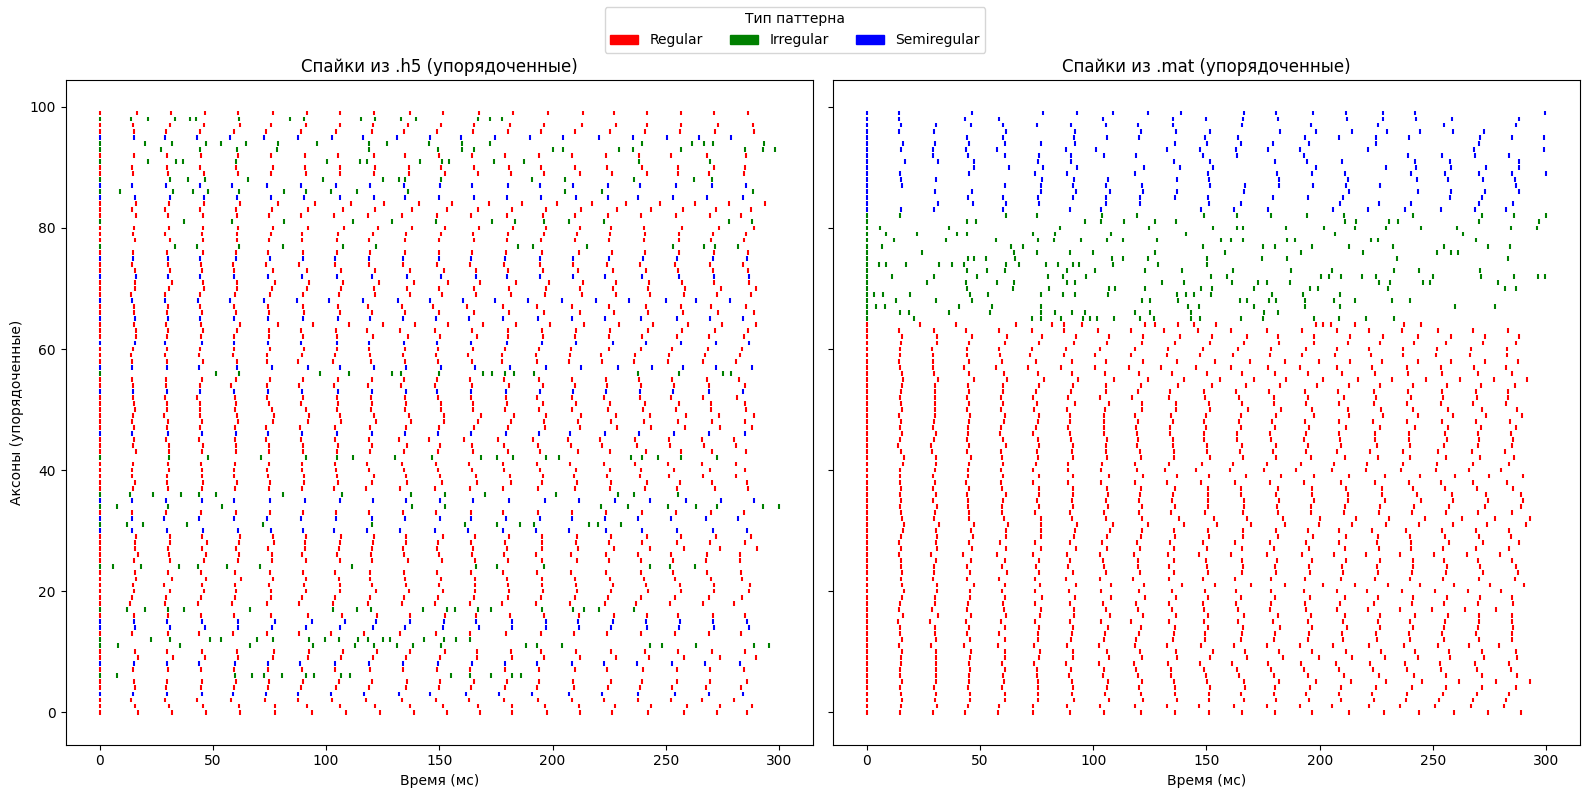

In [50]:
import h5py
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# === Цвета и классификация ===
axon_palette = {
    "regular": "red",
    "irregular": "green",
    "semiregular": "blue"
}

def classify_axon(axon, regular=65, irregular=[65, 83]):
    if axon < regular:
        return "regular"
    elif irregular[0] <= axon < irregular[1]:
        return "irregular"
    else:
        return "semiregular"

# === Загрузка данных из .h5 ===
h5_filepath = "SpikeData_300.h5"

with h5py.File(h5_filepath, 'r') as df:
    start_times_h5 = df["spikes/start"][:]  # shape (100, N)
    patterns = [p.decode("utf-8").lower() for p in df["spikes/patterns"][:]]  # lowercase

# === Упорядочим аксоны из .h5 по типу ===
axon_classes = [classify_axon(i) for i in range(100)]

regular_idxs = [i for i, cls in enumerate(axon_classes) if cls == "regular"]
irregular_idxs = [i for i, cls in enumerate(axon_classes) if cls == "irregular"]
semiregular_idxs = [i for i, cls in enumerate(axon_classes) if cls == "semiregular"]
sorted_idxs = regular_idxs + irregular_idxs + semiregular_idxs

start_times_h5_sorted = [start_times_h5[i] for i in sorted_idxs]
patterns_sorted = [patterns[i] for i in sorted_idxs]

print("Индексы по типам:")
print("Regular:", regular_idxs[:5])
print("Irregular:", irregular_idxs[:5])
print("Semiregular:", semiregular_idxs[:5])
print("Первые 5 отсортированных паттернов:", patterns_sorted[:5])

# === Загрузка данных из .mat ===
mat = scipy.io.loadmat("SpikeData.mat")
total_time = float(mat["totalTime"])
spike_times_mat = {}

for i in range(100):
    times = np.vstack(mat["spikeTimesStart"][i]).flatten()
    spike_times_mat[i] = times

# Упорядочим аксоны из .mat в том же порядке
spike_times_mat_sorted = [spike_times_mat[i] for i in sorted_idxs]

# === Построение графиков ===
fig, axes = plt.subplots(1, 2, figsize=(16, 8), sharex=True, sharey=True)

# --- График 1: из h5 ---
for idx, spike_times in enumerate(start_times_h5_sorted):
    pattern = patterns_sorted[idx]
    color = axon_palette.get(pattern, "gray")
    axes[0].vlines(spike_times, idx - 0.4, idx + 0.4, color=color)

axes[0].set_title("Спайки из .h5 (упорядоченные)")
axes[0].set_xlabel("Время (мс)")
axes[0].set_ylabel("Аксоны (упорядоченные)")

# --- График 2: из .mat ---
for idx, spike_times in enumerate(spike_times_mat_sorted):
    pattern = classify_axon(sorted_idxs[idx])
    color = axon_palette.get(pattern, "gray")
    axes[1].vlines(spike_times, idx - 0.4, idx + 0.4, color=color)

axes[1].set_title("Спайки из .mat (упорядоченные)")
axes[1].set_xlabel("Время (мс)")

# Легенда
legend_handles = [mpatches.Patch(color=color, label=label.capitalize()) for label, color in axon_palette.items()]
fig.legend(handles=legend_handles, loc="upper center", ncol=3, title="Тип паттерна")

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


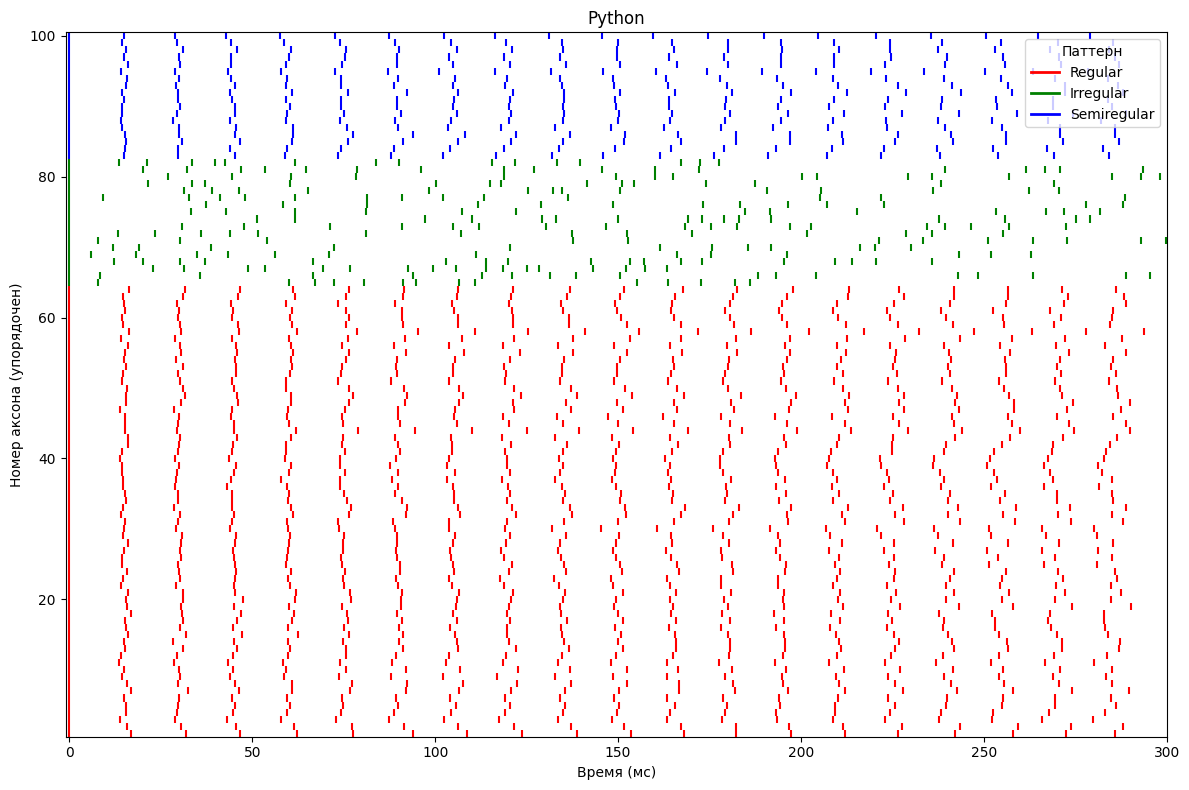

In [58]:
import h5py
import numpy as np
import matplotlib.pyplot as plt

# Цветовая палитра
axon_palette = {
    "regular": "red",
    "irregular": "green",
    "semiregular": "blue"
}

# Загрузка H5-файла
h5_filepath = "SpikeData_300.h5"

with h5py.File(h5_filepath, 'r') as df:
    # Загрузка паттернов
    raw_patterns = df["spikes/patterns"][:]
    # Декодируем байты
    patterns = [p.decode("utf-8").lower() for p in raw_patterns]

    # Загрузка массива спайков (100 аксонов)
    spike_data_raw = df["spikes/start"][:]
    # Удаляем NaN (если они есть) и преобразуем в список списков
    start_times_h5 = [row[~np.isnan(row)] for row in spike_data_raw]

# Сортировка по паттернам
regular_spikes = []
irregular_spikes = []
semiregular_spikes = []

regular_patterns = []
irregular_patterns = []
semiregular_patterns = []

for i in range(100):
    p = patterns[i]
    spikes = start_times_h5[i]
    if p == "regular":
        regular_spikes.append(spikes)
        regular_patterns.append(p)
    elif p == "irregular":
        irregular_spikes.append(spikes)
        irregular_patterns.append(p)
    elif p == "semiregular":
        semiregular_spikes.append(spikes)
        semiregular_patterns.append(p)

# Объединяем в порядке: regular → irregular → semiregular
start_times_h5_sorted = regular_spikes + irregular_spikes + semiregular_spikes
patterns_sorted = regular_patterns + irregular_patterns + semiregular_patterns

# Построение графика
fig, ax = plt.subplots(figsize=(12, 8))

for i, (spike_times, pattern) in enumerate(zip(start_times_h5_sorted, patterns_sorted)):
    color = axon_palette[pattern]
    ax.vlines(spike_times, i + 0.5, i + 1.5, color=color)

# Настройка осей
ax.set_xlabel("Время (мс)")
ax.set_ylabel("Номер аксона (упорядочен)")
ax.set_title("Python")
ax.set_xlim([-1, 300])  # можно адаптировать к длине симуляции
ax.set_ylim([0.5, len(start_times_h5_sorted) + 0.5])

# Легенда
custom_legend = [plt.Line2D([0], [0], color=color, lw=2, label=label.capitalize())
                 for label, color in axon_palette.items()]
ax.legend(handles=custom_legend, title="Паттерн")

plt.tight_layout()
plt.show()


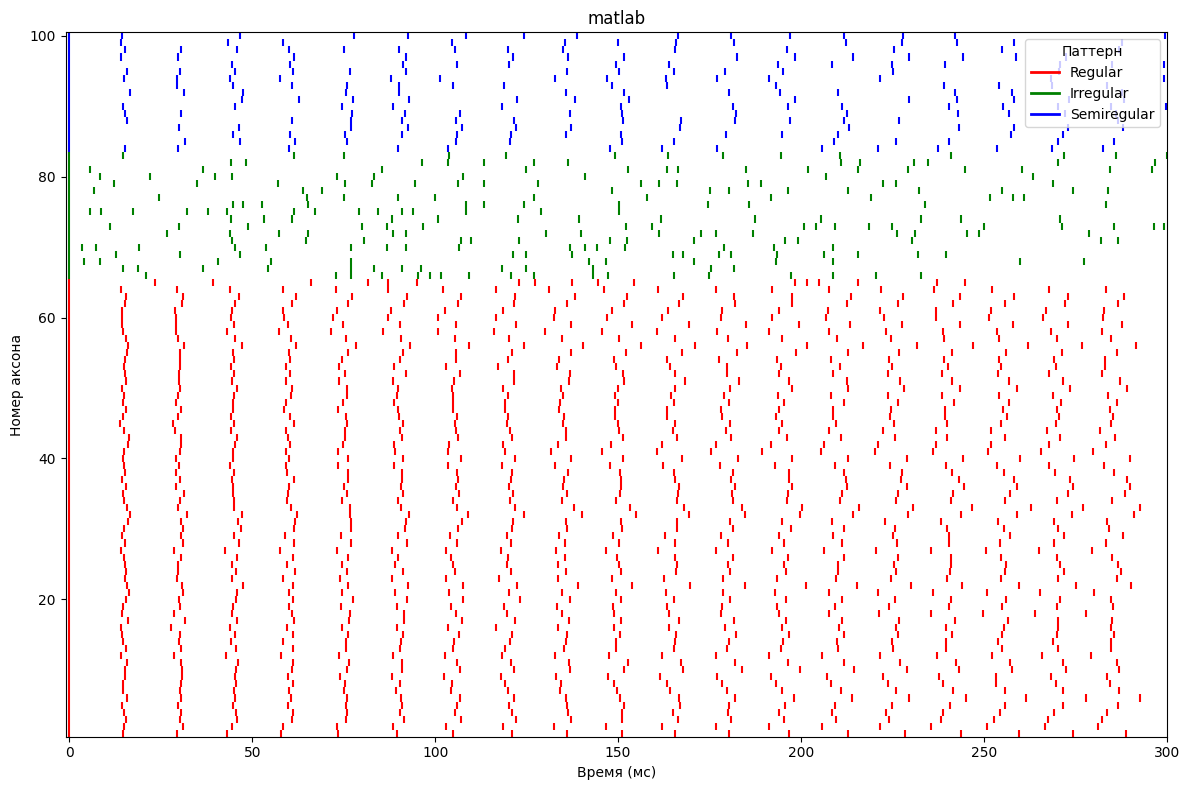

In [57]:
import scipy.io
import numpy as np
import matplotlib.pyplot as plt

axon_palette = {
    "regular": "red",
    "irregular": "green",
    "semiregular": "blue"
}

def classify_axon(axon_idx, regular=65, irregular=[65, 83]):
    if axon_idx < regular:
        return "regular"
    elif irregular[0] <= axon_idx < irregular[1]:
        return "irregular"
    else:
        return "semiregular"

# Загрузка mat файла
file = r'SpikeData.mat'
mat = scipy.io.loadmat(file)

total_time = int(mat["totalTime"][0][0])
time = np.arange(0, total_time, 1)

# Спайки с начала
spike_times_start = {}
for i in range(100):
    spikes = np.vstack(mat["spikeTimesStart"][i][:]).flatten()
    spike_times_start[i] = spikes.tolist()

# Классификация и сортировка
regular_spikes = []
irregular_spikes = []
semiregular_spikes = []

for i in range(100):
    pattern = classify_axon(i)
    spikes = spike_times_start[i]
    if pattern == "regular":
        regular_spikes.append(spikes)
    elif pattern == "irregular":
        irregular_spikes.append(spikes)
    else:
        semiregular_spikes.append(spikes)

# Объединяем по порядку
spikes_sorted = regular_spikes + irregular_spikes + semiregular_spikes

# Рисуем растр
fig, ax = plt.subplots(figsize=(12, 8))

for i, spikes in enumerate(spikes_sorted):
    # Определяем цвет по индексу (соответствует классификации)
    if i < 65:
        color = axon_palette["regular"]
    elif 65 <= i < 83:
        color = axon_palette["irregular"]
    else:
        color = axon_palette["semiregular"]
    ax.vlines(spikes, i + 0.5, i + 1.5, color=color)

ax.set_xlabel("Время (мс)")
ax.set_ylabel("Номер аксона")
ax.set_title("matlab")
ax.set_xlim([-1, total_time])
ax.set_ylim([0.5, len(spikes_sorted) + 0.5])

custom_legend = [plt.Line2D([0], [0], color=color, lw=2, label=label.capitalize())
                 for label, color in axon_palette.items()]
ax.legend(handles=custom_legend, title="Паттерн")

plt.tight_layout()
plt.show()


TypeError: A single argument passed to legend() must be a list of labels, but found an Artist in there.

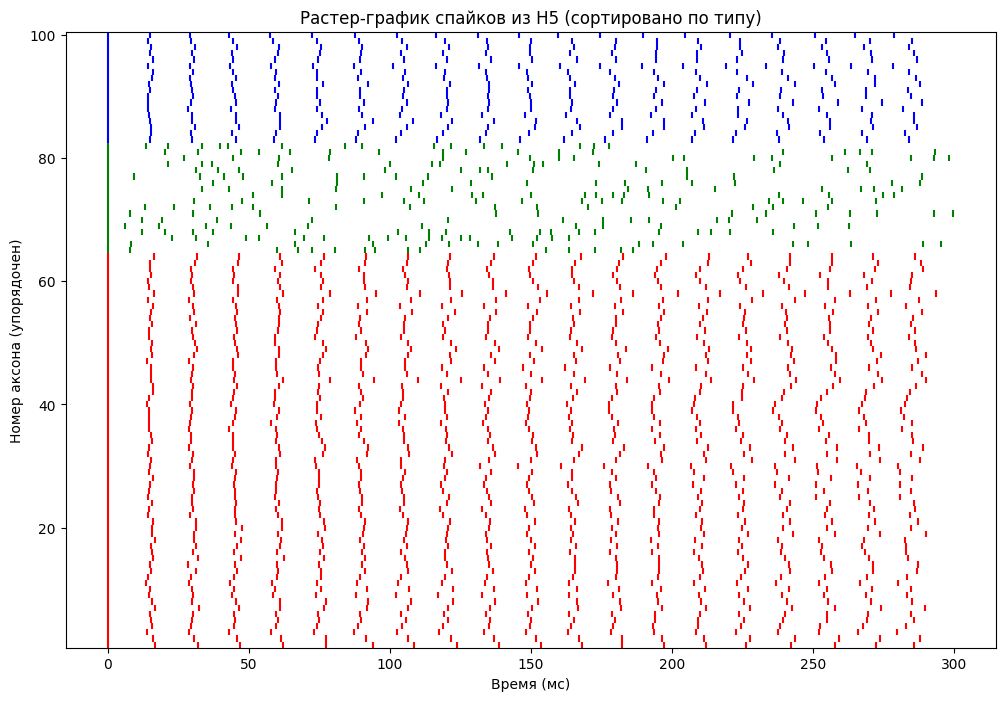

In [54]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import scipy.io

axon_palette = {
    "regular": "red",
    "irregular": "green",
    "semiregular": "blue"
}

def plot_h5_raster(h5_filepath):
    with h5py.File(h5_filepath, 'r') as df:
        raw_patterns = df["spikes/patterns"][:]
        patterns = [p.decode("utf-8").lower() for p in raw_patterns]

        spike_data_raw = df["spikes/start"][:]
        start_times_h5 = [row[~np.isnan(row)] for row in spike_data_raw]

    regular_spikes, irregular_spikes, semiregular_spikes = [], [], []
    regular_patterns, irregular_patterns, semiregular_patterns = [], [], []

    for i in range(len(patterns)):
        p = patterns[i]
        spikes = start_times_h5[i]
        if p == "regular":
            regular_spikes.append(spikes)
            regular_patterns.append(p)
        elif p == "irregular":
            irregular_spikes.append(spikes)
            irregular_patterns.append(p)
        elif p == "semiregular":
            semiregular_spikes.append(spikes)
            semiregular_patterns.append(p)

    spikes_sorted = regular_spikes + irregular_spikes + semiregular_spikes
    patterns_sorted = regular_patterns + irregular_patterns + semiregular_patterns

    fig, ax = plt.subplots(figsize=(12, 8))
    for i, (spikes, pattern) in enumerate(zip(spikes_sorted, patterns_sorted)):
        color = axon_palette[pattern]
        ax.vlines(spikes, i + 0.5, i + 1.5, color=color)
    ax.set_xlabel("Время (мс)")
    ax.set_ylabel("Номер аксона (упорядочен)")
    ax.set_title("Растер-график спайков из H5 (сортировано по типу)")
    ax.set_ylim([0.5, len(spikes_sorted) + 0.5])
    ax.legend([plt.Line2D([0], [0], color=c, lw=2, label=l.capitalize()) for l, c in axon_palette.items()],
              title="Паттерн")
    plt.tight_layout()
    plt.show()

def classify_axon(i, regular=65, irregular=[65, 83]):
    if i < regular:
        return "regular"
    elif irregular[0] <= i < irregular[1]:
        return "irregular"
    else:
        return "semiregular"

def plot_mat_raster(mat_filepath):
    mat = scipy.io.loadmat(mat_filepath)
    total_time = int(mat["totalTime"][0][0])

    spike_times_start = {}
    for i in range(100):
        spikes = np.vstack(mat["spikeTimesStart"][i][:]).flatten()
        spike_times_start[i] = spikes.tolist()

    regular_spikes, irregular_spikes, semiregular_spikes = [], [], []

    for i in range(100):
        pattern = classify_axon(i)
        spikes = spike_times_start[i]
        if pattern == "regular":
            regular_spikes.append(spikes)
        elif pattern == "irregular":
            irregular_spikes.append(spikes)
        else:
            semiregular_spikes.append(spikes)

    spikes_sorted = regular_spikes + irregular_spikes + semiregular_spikes

    fig, ax = plt.subplots(figsize=(12, 8))
    for i, spikes in enumerate(spikes_sorted):
        if i < 65:
            color = axon_palette["regular"]
        elif 65 <= i < 83:
            color = axon_palette["irregular"]
        else:
            color = axon_palette["semiregular"]
        ax.vlines(spikes, i + 0.5, i + 1.5, color=color)
    ax.set_xlabel("Время (мс)")
    ax.set_ylabel("Номер аксона (упорядочен)")
    ax.set_title("Растер-график спайков из .mat (сортировано по типу)")
    ax.set_xlim([0, total_time])
    ax.set_ylim([0.5, len(spikes_sorted) + 0.5])
    ax.legend([plt.Line2D([0], [0], color=c, lw=2, label=l.capitalize()) for l, c in axon_palette.items()],
              title="Паттерн")
    plt.tight_layout()
    plt.show()


# Пример вызова
h5_path = "SpikeData_300.h5"
mat_path = r"SpikeData.mat"

plot_h5_raster(h5_path)
plot_mat_raster(mat_path)
